In [1]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install ast
%pip install logging
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached AST-0.0.2.tar.gz (19 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/d8/yhrnl4gn78vbcvy365vfz_q00000gp/T/pip-install-2w6panty/ast_cb7a649db9a44b2ca43cfe93a0d08c4a/setup.py", line 6, in <module>
          README = codecs.open(os.path.join(here, 'AST/README'), encoding='utf8').read()
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "<frozen codecs>", line 918, in open
      FileNotFoundError: [Errno 2] No such file or di

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy import stats
import numpy as np


Descriptive Statistics:
       Babbles_len    Treatment  No. eggs hatched from nest  \
count  3288.000000  3288.000000                 3288.000000   
mean     37.927616     0.483881                    6.473844   
min       1.000000     0.000000                    4.000000   
25%       5.000000     0.000000                    6.000000   
50%      12.000000     0.000000                    7.000000   
75%      32.000000     1.000000                    7.000000   
max    1568.000000     2.000000                    8.000000   
std      91.602275     0.705739                    1.006482   

       No. birds fledged from nest  Age on bout day  Days prior to fledging  \
count                  3288.000000      3288.000000             3288.000000   
mean                      5.538017        27.463504                4.455900   
min                       4.000000        20.000000                0.000000   
25%                       4.000000        25.000000                2.000000   
50%          

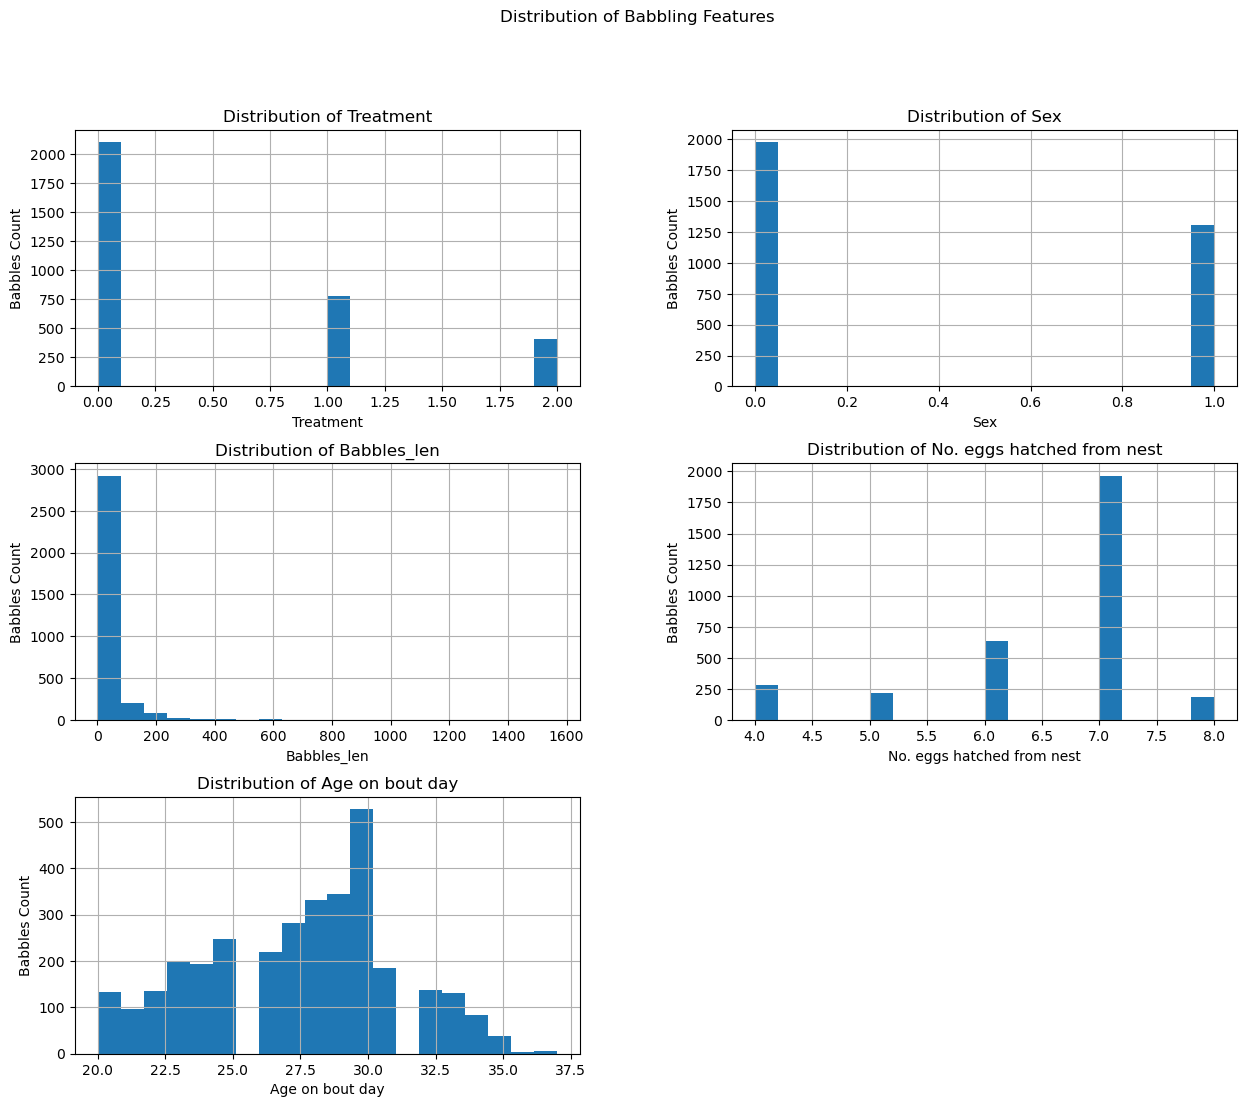

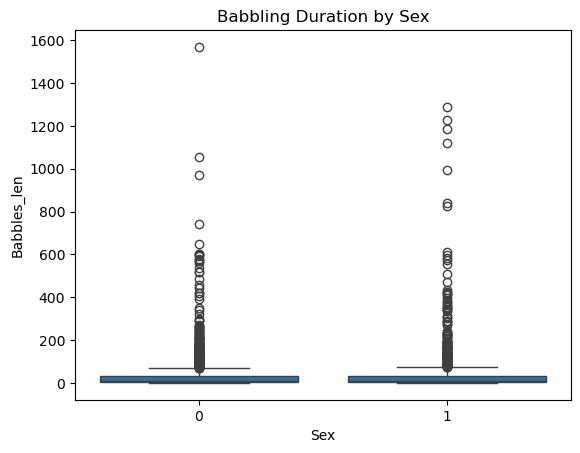

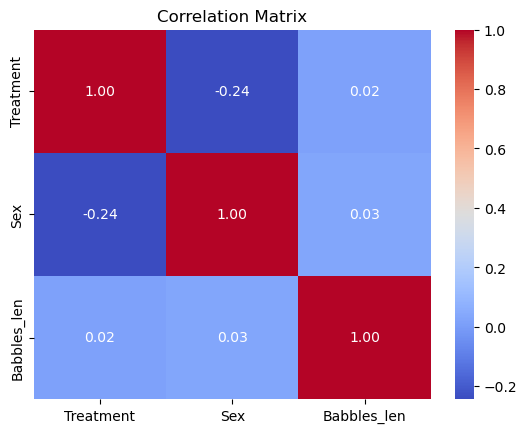

In [ ]:
# Load the dataset
df = pd.read_csv('../CMBabble_Master_clean.csv')


df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df['Treatment'] = df['Treatment'].map({'CONTROL': 0, 'CORT': 1, 'OIL': 2})
df['Hatch date'] = pd.to_datetime(df['Hatch date'], errors='coerce')
df['Babbles_len'] = df['Babbles'].apply(lambda x: len(eval(x)))

# Basic descriptive statistics
print("Descriptive Statistics:")
print(df[['Babbles_len', 'Treatment', 'No. eggs hatched from nest', 'No. birds fledged from nest', 'Age on bout day', 'Days prior to fledging', 'Hatch date', 'Fledge date','Fledge age', 'Date on vocalization', 'Date on vocalization 2']].describe())


# Histograms for numerical data
columns = ['Treatment', 'Sex', 'Babbles_len', 'No. eggs hatched from nest', 'Age on bout day']
axes = df[columns].hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribution of Babbling Features')

# Set dynamic titles and axis labels
for ax, col in zip(axes.flatten(), columns):
    ax.set_title(f'Distribution of {col}')  # Set dynamic title
    ax.set_xlabel(col)                     # Set x-axis label
    ax.set_ylabel('Babbles Count')         # Set y-axis label

# Show the plot
plt.show()

# Box plots to check for outliers
sns.boxplot(x='Sex', y='Babbles_len', data=df)
plt.title('Babbling Duration by Sex')
plt.show()

# Correlation heatmap
corr = df[['Treatment', 'Sex', 'Babbles_len']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# # Time series analysis of babbling occurrences over time (if time column exists)
# df['time'] = pd.to_datetime(df['time'])
# df.set_index('time', inplace=True)
# df['duration'].resample('D').mean().plot()
# plt.title('Average Babbling Duration Over Time')
# plt.show()